#### Problem Statement :
#### 1.The data is related to direct marketing campaigns of a Portuguese banking institution.
#### 2.The marketing campaigns were based on phone calls.
#### 3.Often, more than one contact to the same customer was required
#### 4.The goal is to predict if a customer will subscribe a term deposit or not.####

#### Import the library ####

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

#### Data processing ####

In [4]:
data = pd.read_csv("D:\\Hema\\R-Sessions-Marsian\\Datasets\\Logistic Regression\\bank-additional\\bank-additional-full.csv",header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [7]:
data['education'] = np.where(data['education']=='basic.4y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.6y','Basic',data['education'])
data['education'] = np.where(data['education']=='basic.9y','Basic',data['education'])

In [8]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

#### Data Exploration ####

In [9]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

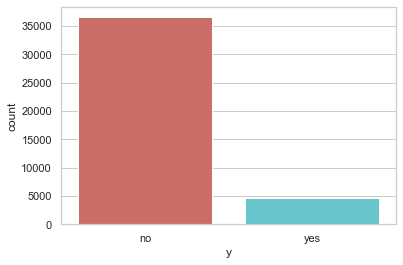

<Figure size 432x288 with 0 Axes>

In [10]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [11]:
count_no_sub = len(data[data['y']== 'no'])
count_no_sub
count_sub = len(data[data['y']== 'yes'])
count_sub
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Percentage of no subscription is: " ,pct_of_no_sub*100)
pct_of_sub = count_sub/(count_sub+count_no_sub)
print("Percentage of subscription is: ", pct_of_sub*100)

Percentage of no subscription is:  88.73458288821988
Percentage of subscription is:  11.265417111780131


#### Our classes are imbalanced and the ratio of no-subscription to subscription is 89:11.
#### Lets do some more exploration before we go ahead to balance the classes ####

In [12]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


#### Observations
#### 1.The avg. age of customers who bought the term deposit is higher than the customers who didn't
#### 2.The pdays(days since the customer was last contacted) is lower for customers who bought it.The 
#### lower the pdays the better is the memory of last call and hence better the chances of sale.
#### 3.Campaigns(number of calls during the current campaign)are lower for customers who bought the term deposit ####

In [13]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [14]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [15]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


#### Data Visualization ####

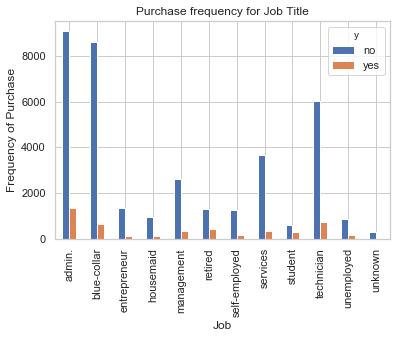

In [16]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('Purchase_fre_job')

#### The frequency of purchase of deposit depends a great deal on job title.Thus job title can be a good predictor of outcome variable.####

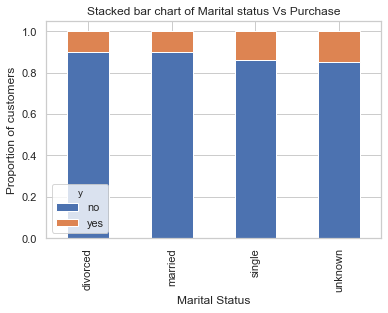

In [17]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Stacked bar chart of Marital status Vs Purchase")
plt.xlabel("Marital Status")
plt.ylabel("Proportion of customers")
plt.savefig("marital_vs_pur_stack")

#### Marital status does not seem to be a good indicator of outcome variable ####

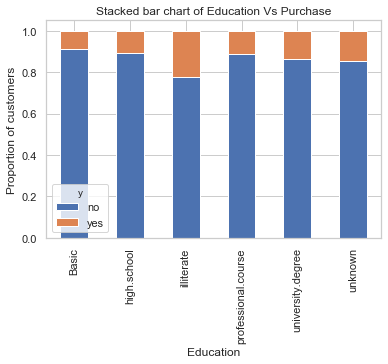

In [18]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title("Stacked bar chart of Education Vs Purchase")
plt.xlabel("Education")
plt.ylabel("Proportion of customers")
plt.savefig("edu_vs_pur_stack")

#### Education seems to be a good predictor of outcome variable ####

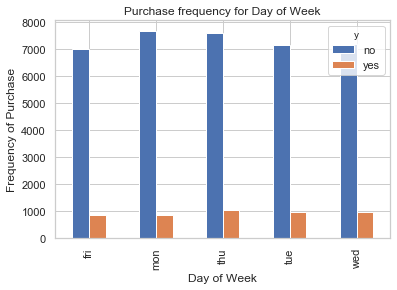

In [19]:
pd.crosstab(data.day_of_week,data.y).plot(kind = 'bar')
plt.title("Purchase frequency for Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency of Purchase")
plt.savefig("pur_dayofweek_bar")

#### Day of week may not be a good predictor of outcome ####

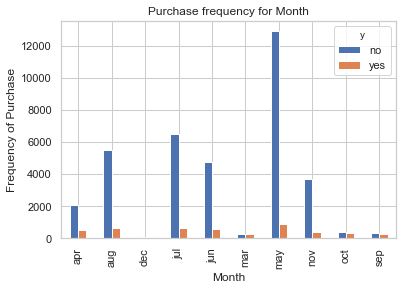

In [20]:
pd.crosstab(data.month,data.y).plot(kind = 'bar')
plt.title("Purchase frequency for Month")
plt.xlabel("Month")
plt.ylabel("Frequency of Purchase")
plt.savefig("pur_fre_month_bar")

#### Month might be a good predictor of outcome variable ####

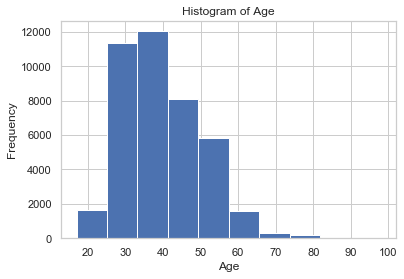

In [21]:
data.age.hist()
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("age_hist")

#### Most of the customers of the bank in this dataset are in the range 30-40 ####

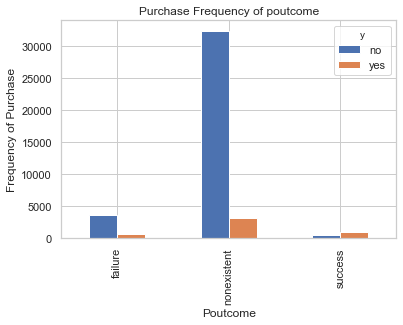

In [22]:
table = pd.crosstab(data.poutcome,data.y).plot(kind = 'bar')
plt.title("Purchase Frequency of poutcome")
plt.xlabel("Poutcome")
plt.ylabel("Frequency of Purchase")
plt.savefig("pur_fre_pout_bar")

#### Poutcome seems to be a good indicator of outcome variable ####

#### Create dummy variables ####

In [23]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var],prefix=var)
    data1 = data.join(cat_list)
    data = data1
          
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']    
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

#### Our Final columns ####

In [24]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

#### Oversampling using SMOTE
#### We will up-sample the no-subscription using SMOTE(synthetic minority oversampling technique)
#### 1. Works by creating synthetic samples from the minor class(no-subscription)instead of creating copies.
#### 2.Randomly choosing one of the k-nearest neighbors and using it to create a similar but randomly tweaked new observations ####

In [25]:
X = data_final.loc[:,data_final.columns!='y']
y = data_final.loc[:,data_final.columns=='y']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
columns = X_train.columns

os_data_X,os_data_y = os.fit_resample(X_train,y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns = columns)
os_data_y = pd.DataFrame(data=os_data_y,columns = ['y'])

In [26]:
print("Length of oversampled data is: ", len(os_data_X))
print("Number of no subscription in oversampled data is:", len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription in oversampled data is:", len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription in oversampled data is:",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription in oversampled data is:",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

Length of oversampled data is:  51158
Number of no subscription in oversampled data is: 25579
Number of subscription in oversampled data is: 25579
Proportion of no subscription in oversampled data is: 0.5
Proportion of subscription in oversampled data is: 0.5
